# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import NMF 

plt.style.use('ggplot')

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [8]:
df_links = pd.read_csv('data/ml-latest-small/links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
df_movies = pd.read_csv('data/ml-latest-small/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
df_tags = pd.read_csv('data/ml-latest-small/tags.csv')
df_tags.shape

(3683, 4)

In [11]:
df_ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [12]:
len(df_ratings['movieId'].unique()), len(df_ratings['userId'].unique()), 

(9724, 610)

#### What is the average rating

In [13]:
df_ratings['rating'].groupby(df_ratings['movieId']).mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

#### which rating appears the most?

In [14]:
df_ratings['rating'].groupby(df_ratings['movieId']).count().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [15]:
df_ratings['rating'].groupby(df_ratings['movieId']).count().nlargest(3)

movieId
356    329
318    317
296    307
Name: rating, dtype: int64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [16]:
df_ratings[df_ratings['rating']==5].groupby(df_ratings['movieId']).count()

,userId,movieId,rating,timestamp
movieId,,,,
1,47,47,47,47
2,7,7,7,7
3,6,6,6,6
5,3,3,3,3
6,24,24,24,24
...,...,...,...,...
184245,1,1,1,1
185135,1,1,1,1
187593,4,4,4,4


In [17]:
total_ratings = df_ratings.groupby('movieId')['rating'].count()
five_star_ratings = df_ratings[df_ratings['rating'] == 5].groupby('movieId')['rating'].count()

percentage_five_star = (five_star_ratings / total_ratings) * 100
percentage_five_star 

movieId
1         21.860465
2          6.363636
3         11.538462
4               NaN
5          6.122449
            ...    
193581          NaN
193583          NaN
193585          NaN
193587          NaN
193609          NaN
Name: rating, Length: 9724, dtype: float64

---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [18]:
total_ratings = df_ratings.groupby('userId')['rating'].count()
total_ratings

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

- How many users have rated more than 20 movies?

In [19]:
total_ratings = total_ratings.reset_index()
total_ratings[total_ratings['rating']>20].count()



userId    596
rating    596
dtype: int64

- How many movies rated the user with the most/ least ratings?

In [20]:
count_rate = df_ratings['rating'].groupby(df_ratings['movieId']).count().reset_index()
count_rate[count_rate['rating'] == count_rate['rating'].min()].count(), count_rate[count_rate['rating'] == count_rate['rating'].max()].count()

(movieId    3446
 rating     3446
 dtype: int64,
 movieId    1
 rating     1
 dtype: int64)

-  What is the *median* number of ratings?

In [21]:
count_rate

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [22]:
count_rate['rating'].mean()

10.369806663924312

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution? I think it's exponentional
    - Hint: `sns.histplot()`

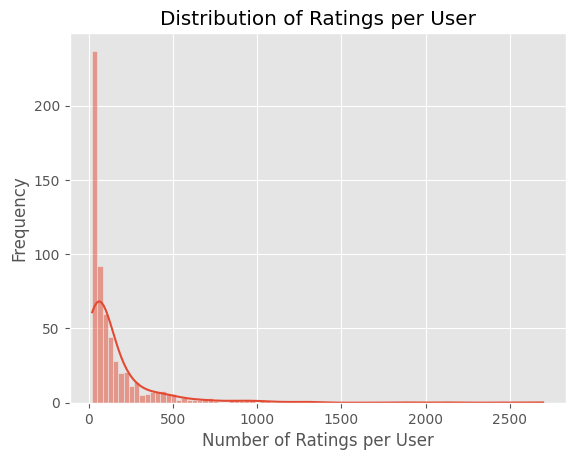

In [23]:
sns.histplot(data=df_ratings.groupby('userId')['rating'].count(), kde=True)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User')
plt.show()

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [24]:
user_ratings = df_ratings.groupby('userId')['rating'].mean()
user_ratings.sort_values()

userId
442    1.275000
139    2.144330
508    2.145833
153    2.217877
567    2.245455
         ...   
30     4.735294
25     4.807692
515    4.846154
251    4.869565
53     5.000000
Name: rating, Length: 610, dtype: float64

- Which user gave the worst ratings on average, which user gave the best ratings? 442-Hater, 53-Lover

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?  YES

In [25]:
total_ratings[total_ratings['rating']>20]


,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


- Plot the distribution of average ratings! How would you characterize the distribution?

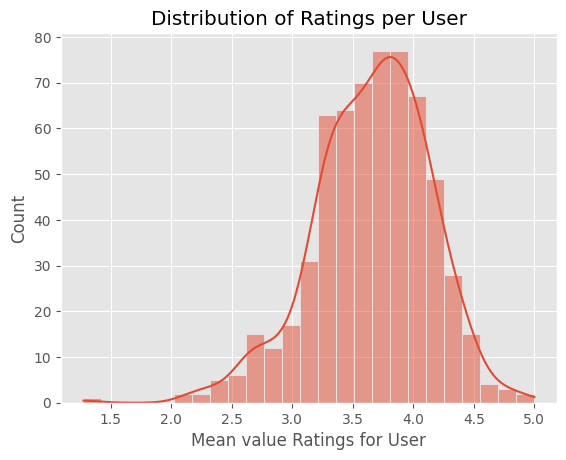

In [26]:
sns.histplot(data=user_ratings, kde=True)
plt.xlabel('Mean value Ratings for User')
plt.ylabel('Count')
plt.title('Distribution of Ratings per User')
plt.show()

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [27]:
df_movies[df_movies['title'].duplicated() == True]

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [28]:
rating_count = df_ratings.groupby('movieId')[['rating']].count()

In [29]:
df_movies_popular = rating_count[rating_count['rating']>20].index

In [30]:
df = df_ratings[df_ratings['movieId'].isin(df_movies_popular)].copy()
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100803,610,148626,4.0,1493847175
100808,610,152081,4.0,1493846503
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365


In [31]:
user_ids = df['userId'].unique()
user_id_map = {v:k for k,v in enumerate(user_ids)}
df['userId'] = df['userId'].map(user_id_map)

In [32]:
movie_ids = df['movieId'].unique()
movie_id_map = {v:k for k,v in enumerate(movie_ids)}
df['movieId'] = df['movieId'].map(movie_id_map)
df

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100803,609,808,4.0,1493847175
100808,609,643,4.0,1493846503
100829,609,809,5.0,1493845631
100830,609,644,4.0,1493879365


In [33]:
from scipy.sparse import csr_matrix


In [34]:
R = csr_matrix((df['rating'], (df['userId'], df['movieId'])))
R

<610x1235 sparse matrix of type '<class 'numpy.float64'>'
	with 66658 stored elements in Compressed Sparse Row format>

#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [35]:

df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)', expand=False)

df_movies
# Output

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [36]:
df_movies['list'] = df_movies['genres'].str.split('|')
df_movies['list'].groupby(df_movies['movieId']).count()

movieId
1         1
2         1
3         1
4         1
5         1
         ..
193581    1
193583    1
193585    1
193587    1
193609    1
Name: list, Length: 9742, dtype: int64

In [37]:
df_movies

,movieId,title,genres,year,list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),Drama,2017,[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,"[Action, Animation]"


In [38]:
df_movies_list=df_movies.explode('list')

In [39]:
df_movies_list

,movieId,title,genres,year,list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Fantasy
...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,Fantasy
9739,193585,Flint (2017),Drama,2017,Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,Animation


In [40]:
len(df_movies_list['list'].unique())

20

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [41]:
df_new = df_movies.merge(df_ratings, on='movieId')
df_new.shape

(100836, 8)

---
#### Count the number of ratings per movie title!

In [42]:
df_new['rating'].groupby(df_new['title']).count()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

- What are the top 10 most rated movies in the dataset?

In [43]:
df_new['rating'].groupby(df_new['title']).count().nlargest(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

In [44]:
df_new['rating'].groupby(df_new['title']).mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

---

#### Calculate the average rating per movie title!

In [45]:
df_new['rating'].groupby(df_new['title']).mean()

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

- Make a visualization of the distribution of average ratings per movie

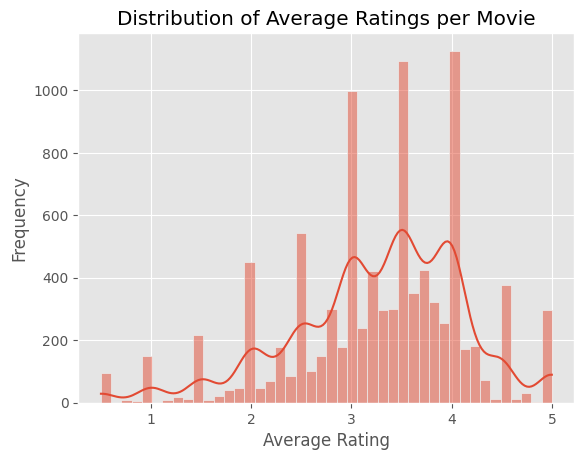

In [46]:
sns.histplot(data=df_new['rating'].groupby(df_new['movieId']).mean(), kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings per Movie')
plt.show()

In [47]:
df_new['rating'].groupby(df_new['title']).mean().nlargest(1), df_new['rating'].groupby(df_new['title']).mean().nsmallest(1)

(title
 'Salem's Lot (2004)    5.0
 Name: rating, dtype: float64,
 title
 3 Ninjas Knuckle Up (1995)    0.5
 Name: rating, dtype: float64)

In [48]:
filtered_ratings = df_new.groupby(['title','year'])['rating'].agg(['mean', 'count'])
filtered_ratings = filtered_ratings[filtered_ratings['count'] >= 30]
top_movie = filtered_ratings.nlargest(3, 'mean')
worst_movie = filtered_ratings.nsmallest(3, 'mean')
top_movie, worst_movie

(                                           mean  count
 title                            year                 
 Shawshank Redemption, The (1994) 1994  4.429022    317
 Lawrence of Arabia (1962)        1962  4.300000     45
 Godfather, The (1972)            1972  4.289062    192,
                                                  mean  count
 title                                  year                 
 Godzilla (1998)                        1998  1.954545     33
 I Know What You Did Last Summer (1997) 1997  2.109375     32
 Wild Wild West (1999)                  1999  2.207547     53)

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!

In [49]:
#df_new_popular= df_new[df_new['rating'].count()]
#df_new['rating'].groupby(df_new['title']).mean().nlargest(1)

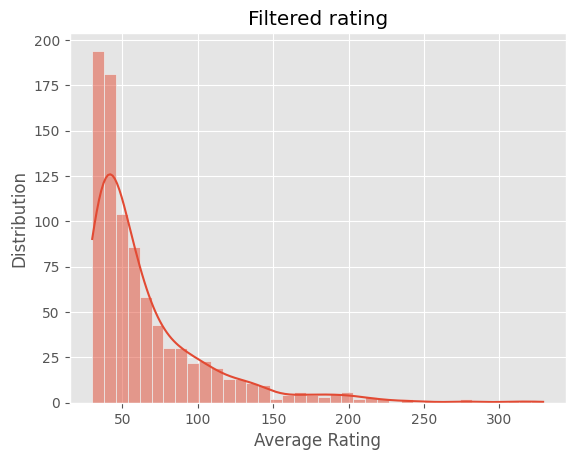

In [50]:
sns.histplot(data=filtered_ratings['count'], kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Distribution')
plt.title('Filtered rating')
plt.show()

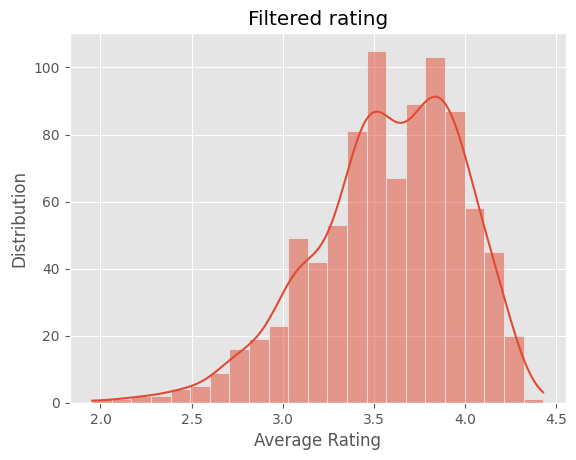

In [51]:
sns.histplot(data=filtered_ratings['mean'], kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Distribution')
plt.title('Filtered rating')
plt.show()

In [52]:
df_recommend = df_new[['title', 'userId', 'rating']]

In [53]:
df_recommend = df_recommend.pivot_table(index='userId', columns='title', values='rating')
df_recommend

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [54]:
mn = df_recommend.mean(axis=1)
mn = mn.mean()

In [55]:
user_ratings = df_recommend.fillna(mn)

In [56]:
movies = user_ratings.columns.to_list()
movies[:-15]

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...All the Marbles (1981)',
 '...And Justice for All (1979)',
 '00 Schneider - Jagd auf Nihil Baxter (1994)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Cent Pistol (2015)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Streets (2016)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 "101 Dalmatians II: Patch's London Adventure (2003)",
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th & Wolf (2006)',
 '10th Kingdom, The (2000)',
 '10th Victim, The (La decima vittima) (1965)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2

In [57]:
users = users = user_ratings.index.to_list()
users[:3]

[1, 2, 3]

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

In [58]:
nmf_model = NMF(
    n_components=20, 
    max_iter=1000, 
    tol = 0.001)

In [59]:
nmf_model.fit(user_ratings)

NMF(max_iter=1000, n_components=20, tol=0.001)

In [60]:
Q_matrix = nmf_model.components_
Q_matrix

array([[ 2.1407049 ,  0.02306505,  0.02238414, ...,  2.01892262,
         2.04613837,  0.        ],
       [ 0.        ,  0.94360095,  0.94397238, ...,  2.27927983,
         2.3631073 ,  0.94286031],
       [11.65385504,  7.37462036,  7.38405758, ..., 12.61968587,
         0.        ,  7.38472117],
       ...,
       [ 2.38649485,  2.51549234,  2.51792705, ...,  2.4742404 ,
         2.57561709,  2.51296811],
       [ 2.98996692,  2.71163806,  2.70463398, ...,  2.95347239,
         2.93586477,  2.69792648],
       [ 3.27383986,  3.63404301,  3.63416758, ...,  3.2269492 ,
         3.23125688,  3.6373451 ]])

In [61]:
Q_matrix.shape

(20, 9719)

In [62]:
Q = pd.DataFrame(Q_matrix, columns=movies, index=nmf_model.get_feature_names_out())
Q

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
nmf0,2.140705,0.023065,0.022384,0.280117,0.028280,0.000000,1.779777,2.141504,0.000000,1.815708,...,1.832477,2.331383,0.027854,0.026525,2.136607,0.272077,2.082163,2.018923,2.046138,0.000000
nmf1,0.000000,0.943601,0.943972,0.149307,0.940842,1.345681,4.380885,0.000000,3.310213,2.373970,...,2.445010,0.000000,1.247889,1.249205,0.000000,0.060668,2.769001,2.279280,2.363107,0.942860
nmf2,11.653855,7.374620,7.384058,7.473326,7.339201,7.443416,0.000000,11.873759,0.000000,2.234273,...,11.824355,11.601630,7.542760,7.575486,11.729131,0.000000,13.043110,12.619686,0.000000,7.384721
nmf3,11.818787,7.001414,7.005211,6.838300,6.893650,7.110645,13.876775,12.173909,0.000000,0.000000,...,0.000000,11.080380,7.046495,6.939576,11.702162,6.654925,0.000000,9.060258,4.379397,6.952198
nmf4,5.764312,2.947711,3.012193,1.702690,2.633966,2.798580,0.000000,1.241317,16.498408,7.466675,...,7.511307,0.000000,2.707936,1.856961,4.995495,9.511344,0.000000,0.000000,0.000000,2.878842
nmf5,19.880833,2.881442,2.734347,3.721069,3.008856,3.764564,0.000000,0.000000,0.000000,5.988126,...,0.000000,13.236290,4.031276,6.931063,20.930323,0.000000,0.000000,39.742770,0.000000,3.649809
nmf6,5.303898,6.409184,6.469912,8.394927,6.565072,6.148946,0.000000,11.225700,3.898123,5.072435,...,5.112899,10.746730,6.417297,7.290016,6.047263,12.428481,0.000000,15.493164,0.000000,6.396127
nmf7,0.000000,0.000000,0.000000,12.583250,0.000000,0.000000,0.000000,0.000000,0.000000,2.982500,...,3.054324,76.941883,0.000000,0.000000,0.000000,56.681314,2.891955,15.084021,17.091844,0.000000
nmf8,0.000000,1.141212,1.157542,0.000000,0.592275,4.786964,14.654910,7.160284,0.000000,3.369543,...,2.940836,0.000000,3.854722,4.245082,0.265297,0.000000,0.000000,0.000000,4.167951,1.051210
nmf9,8.375847,6.161521,5.976395,4.421201,5.907915,6.090604,0.000000,25.429629,50.262775,32.165358,...,24.098832,23.146932,8.595996,11.333525,12.724665,63.635395,0.000000,0.000000,36.702143,8.047624


In [63]:
Ratings = user_ratings.mean(axis=1)
Ratings

userId
1      3.674148
2      3.658088
3      3.652319
4      3.654960
5      3.657125
         ...   
606    3.657240
607    3.659699
608    3.612498
609    3.655746
610    3.661418
Length: 610, dtype: float64

In [64]:
P_matrix = nmf_model.transform(user_ratings)
P_matrix

array([[1.28709640e-01, 0.00000000e+00, 5.20716349e-03, ...,
        2.30078618e-04, 5.55883683e-04, 8.24414035e-05],
       [1.26127783e-01, 0.00000000e+00, 3.44605251e-03, ...,
        9.18796508e-03, 0.00000000e+00, 0.00000000e+00],
       [1.22801129e-01, 0.00000000e+00, 4.40094416e-03, ...,
        1.21365178e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.59242361e-02, 0.00000000e+00, 2.62532080e-02, ...,
        3.97101749e-03, 0.00000000e+00, 1.47950768e-02],
       [1.26460381e-01, 0.00000000e+00, 3.74935422e-03, ...,
        7.97248837e-03, 0.00000000e+00, 0.00000000e+00],
       [1.22187349e-01, 0.00000000e+00, 5.11075124e-03, ...,
        2.82606434e-02, 0.00000000e+00, 3.70242152e-03]])

In [65]:
P_matrix.shape

(610, 20)

In [66]:
P = pd.DataFrame(
    data=P_matrix, 
    index=users, 
    columns=nmf_model.get_feature_names_out()
)
P

,nmf0,nmf1,nmf2,nmf3,nmf4,nmf5,nmf6,nmf7,nmf8,nmf9,nmf10,nmf11,nmf12,nmf13,nmf14,nmf15,nmf16,nmf17,nmf18,nmf19
1,0.128710,0.0,0.005207,0.003857,0.000547,0.000000,0.002917,0.001955,0.000439,0.000000,0.374990,0.199159,0.168377,0.123611,0.015210,0.847492,0.181388,0.000230,0.000556,0.000082
2,0.126128,0.0,0.003446,0.001394,0.000000,0.000000,0.000075,0.000482,0.000000,0.000000,0.399130,0.212317,0.173627,0.134043,0.015209,0.856973,0.157552,0.009188,0.000000,0.000000
3,0.122801,0.0,0.004401,0.001750,0.000000,0.000000,0.000000,0.000372,0.000000,0.000000,0.392320,0.205035,0.167722,0.132988,0.013920,0.863450,0.155153,0.012137,0.000000,0.000000
4,0.129635,0.0,0.004197,0.002425,0.000000,0.000207,0.000000,0.000067,0.000000,0.000000,0.411119,0.219450,0.176019,0.142862,0.012479,0.837808,0.149609,0.013795,0.000000,0.000000
5,0.126232,0.0,0.003817,0.001724,0.000000,0.000000,0.000091,0.000427,0.000000,0.000000,0.389619,0.207548,0.169782,0.130754,0.016691,0.861757,0.161344,0.008612,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.075726,0.0,0.010055,0.005681,0.011467,0.000190,0.000000,0.000692,0.008999,0.000000,0.378109,0.195043,0.171458,0.135163,0.017852,0.862403,0.124018,0.000808,0.000000,0.003356
607,0.126987,0.0,0.002669,0.001341,0.000000,0.000039,0.000747,0.000510,0.000000,0.000000,0.414214,0.219515,0.178923,0.136455,0.014625,0.839075,0.153512,0.014359,0.000000,0.000000
608,0.015924,0.0,0.026253,0.005374,0.016575,0.000508,0.000000,0.000000,0.000000,0.007695,0.395793,0.223982,0.155670,0.096454,0.027105,0.807291,0.062625,0.003971,0.000000,0.014795
609,0.126460,0.0,0.003749,0.001572,0.000000,0.000000,0.000082,0.000416,0.000000,0.000000,0.392388,0.209078,0.170105,0.131407,0.016203,0.861592,0.159784,0.007972,0.000000,0.000000


In [67]:
R_hat_matrix = np.dot(P,Q)
R_hat_matrix

array([[3.62555051, 3.63241887, 3.63173424, ..., 3.75065358, 3.623242  ,
        3.66251269],
       [3.61550666, 3.63516167, 3.63420883, ..., 3.70081857, 3.66942452,
        3.67249543],
       [3.62582066, 3.64360964, 3.6427005 , ..., 3.67424609, 3.65743687,
        3.66809645],
       ...,
       [3.6216665 , 3.61399284, 3.61282235, ..., 3.66893062, 3.43774698,
        3.72846066],
       [3.61731373, 3.63443187, 3.63348902, ..., 3.70181995, 3.66177286,
        3.67237205],
       [3.7538904 , 3.69836828, 3.69929374, ..., 3.44740598, 3.56813543,
        3.63913109]])

In [68]:
R_hat = pd.DataFrame(
    data=R_hat_matrix, 
    index=users, 
    columns=movies
)
R_hat

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
1,3.625551,3.632419,3.631734,3.654199,3.638262,3.623885,3.693876,3.668195,3.598807,3.687907,...,3.718053,3.671079,3.687951,3.692139,3.653809,3.756424,3.611986,3.750654,3.623242,3.662513
2,3.615507,3.635162,3.634209,3.664369,3.640831,3.612561,3.699235,3.640548,3.635169,3.722904,...,3.735038,3.569293,3.664257,3.666650,3.625902,3.712394,3.644089,3.700819,3.669425,3.672495
3,3.625821,3.643610,3.642700,3.672752,3.649084,3.616180,3.679137,3.642813,3.611426,3.712566,...,3.736392,3.573268,3.638381,3.640664,3.626591,3.700743,3.622496,3.674246,3.657437,3.668096
4,3.629299,3.625305,3.624315,3.658380,3.630687,3.605198,3.708752,3.666800,3.608868,3.707478,...,3.727843,3.567387,3.646806,3.649782,3.632337,3.692688,3.624757,3.694596,3.667189,3.666470
5,3.617147,3.634326,3.633392,3.658282,3.640010,3.610631,3.700004,3.642595,3.633825,3.718585,...,3.733191,3.565658,3.665731,3.668022,3.628264,3.705265,3.647527,3.706889,3.662623,3.671656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.606162,3.627196,3.627254,3.653025,3.622715,3.611075,3.730539,3.646539,3.760845,3.658549,...,3.727849,3.557850,3.660755,3.656924,3.636383,3.785255,3.569415,3.663042,3.604246,3.647185
607,3.611333,3.632464,3.631531,3.668072,3.638163,3.614872,3.693759,3.639957,3.635018,3.730229,...,3.733665,3.565448,3.665115,3.668292,3.617348,3.721264,3.643964,3.710604,3.662975,3.667609
608,3.621667,3.613993,3.612822,3.671286,3.609074,3.543661,3.106758,3.565327,3.935682,3.728471,...,3.876268,3.526093,3.635543,3.646705,3.585611,4.027469,3.555742,3.668931,3.437747,3.728461
609,3.617314,3.634432,3.633489,3.660136,3.640124,3.610542,3.694787,3.640635,3.629310,3.720230,...,3.734616,3.564602,3.661725,3.664051,3.625429,3.703864,3.643827,3.701820,3.661773,3.672372


In [69]:
import pickle

with open('nmf_model_base.pkl',mode='wb') as file:
    pickle.dump(nmf_model,file)

In [70]:
with open('nmf_model_base.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [71]:
loaded_model

NMF(max_iter=1000, n_components=20, tol=0.001)

In [72]:
new_user_query = {"eXistenZ (1999)": 5,
                 "(500) Days of Summer (2009)":4,
                 "...All the Marbles (1981)":3.5,
                 "Better Than Chocolate (1999)":5}

In [73]:
new_user_dataframe =  pd.DataFrame(new_user_query, columns=movies, index=['new_user'])
new_user_dataframe

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
new_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


In [74]:
new_user_dataframe_imputed = new_user_dataframe.fillna(mn)
new_user_dataframe_imputed

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
new_user,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,4,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,5,3.65722,3.65722,3.65722,3.65722


In [75]:
P_new_user_matrix = loaded_model.transform(new_user_dataframe_imputed)
P_new_user_matrix

array([[1.26903362e-01, 0.00000000e+00, 3.40294763e-03, 1.31868545e-03,
        0.00000000e+00, 0.00000000e+00, 1.09995102e-04, 4.57306970e-04,
        0.00000000e+00, 0.00000000e+00, 4.04966457e-01, 2.15304100e-01,
        1.76007698e-01, 1.35912034e-01, 1.45797291e-02, 8.53065249e-01,
        1.55039246e-01, 8.62747467e-03, 0.00000000e+00, 0.00000000e+00]])

In [76]:
P_new_user_matrix.shape

(1, 20)

In [77]:
P_new_user = pd.DataFrame(P_new_user_matrix, 
                         columns = loaded_model.get_feature_names_out(),
                         index = ['new_user'])

In [78]:
P_new_user

,nmf0,nmf1,nmf2,nmf3,nmf4,nmf5,nmf6,nmf7,nmf8,nmf9,nmf10,nmf11,nmf12,nmf13,nmf14,nmf15,nmf16,nmf17,nmf18,nmf19
new_user,0.126903,0.0,0.003403,0.001319,0.0,0.0,0.00011,0.000457,0.0,0.0,0.404966,0.215304,0.176008,0.135912,0.01458,0.853065,0.155039,0.008627,0.0,0.0


In [79]:
R_hat_new_user_matrix = np.dot(P_new_user, Q)
R_hat_new_user_matrix

array([[3.61538519, 3.63308538, 3.63212277, ..., 3.70031718, 3.67038656,
        3.67060239]])

In [80]:
R_hat_new_user = pd.DataFrame(data=R_hat_new_user_matrix,
                         columns=movies,
                         index = ['new_user'])
R_hat_new_user

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
new_user,3.615385,3.633085,3.632123,3.664994,3.638742,3.611404,3.698419,3.6413,3.633143,3.72374,...,3.735721,3.568302,3.662423,3.664901,3.625384,3.711169,3.644189,3.700317,3.670387,3.670602


In [81]:
new_user_query.keys()

dict_keys(['eXistenZ (1999)', '(500) Days of Summer (2009)', '...All the Marbles (1981)', 'Better Than Chocolate (1999)'])

In [82]:
R_hat_new_user_filter =  R_hat_new_user.drop(new_user_query.keys(), axis=1)

In [83]:
R_hat_new_user.T.sort_values(by=['new_user'], ascending=False).index.tolist()

['Matrix, The (1999)',
 'Shrek (2001)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'X-Men (2000)',
 "Ocean's Eleven (2001)",
 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Mission: Impossible II (2000)',
 'Snatch (2000)',
 'Godfather, The (1972)',
 'Saving Private Ryan (1998)',
 'Cast Away (2000)',
 'Mexican, The (2001)',
 'Mummy Returns, The (2001)',
 'Silence of the Lambs, The (1991)',
 'Star Wars: Episode II - Attack of the Clones (2002)',
 'Gladiator (2000)',
 'Planet of the Apes (2001)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'American Beauty (1999)',
 'Sling Blade (1996)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Back to the Future (1985)',
 "Knight's Tale, A (2001)",
 'Aliens (1986)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Big Lebowski, The (1998)',
 'Red Planet (2000)',
 'Chasing Amy (1997)',
 'Ju

In [84]:
ranked =  R_hat_new_user.T.sort_values(by=['new_user'], ascending=False)
ranked

,new_user
"Matrix, The (1999)",4.841907
Shrek (2001),4.823707
Star Wars: Episode VI - Return of the Jedi (1983),4.802715
X-Men (2000),4.774862
Ocean's Eleven (2001),4.718097
...,...
"Good Morning, Vietnam (1987)",3.200987
Vertical Limit (2000),3.199974
Waterworld (1995),3.172618
"Mask, The (1994)",3.088314


In [85]:
ranked_f =  R_hat_new_user_filter.T.sort_values(by=['new_user'], ascending=False)
recommended = ranked_f[:3]
recommended

,new_user
"Matrix, The (1999)",4.841907
Shrek (2001),4.823707
Star Wars: Episode VI - Return of the Jedi (1983),4.802715


In [134]:
def recommend_nmf(new_user_query, model, ratings, k=10, mean_imput=True):
    """
    Filters and recommends the top k movies for any given input query based on a trained nearest neighbors model. 
    Returns a list of k movie ids.
    """
    # 1. candiate generation
    new_user_dataframe =  pd.DataFrame(new_user_query, columns=movies, index=['new_user'])
    # construct a user vector
    if mean_imput:
        mn = ratings.mean(axis=1)
        mn = mn.mean()
    else:
        mn = 0

    new_user_dataframe_imputed = new_user_dataframe.fillna(mn)
  
    P_new_user_matrix = model.transform(new_user_dataframe_imputed)

    P_new_user = pd.DataFrame(P_new_user_matrix, 
                         columns = model.get_feature_names_out(),
                         index = ['new_user'])
  
    R_hat_new_user_matrix = np.dot(P_new_user, Q)
    
    R_hat_new_user = pd.DataFrame(data=R_hat_new_user_matrix,
                         columns=movies,
                         index = ['new_user'])
    new_user_query.keys()

    R_hat_new_user_filter =  R_hat_new_user.drop(new_user_query.keys(), axis=1)

    R_hat_new_user.T.sort_values(by=['new_user'], ascending=False).index.tolist()
    # return the top-k highst rated movie ids or titles
    ranked_f =  R_hat_new_user_filter.T.sort_values(by=['new_user'], ascending=False)
  
    recommendation = ranked_f[:k]  

    return recommendation

In [135]:
new_user_query1 = {"eXistenZ (1999)": 5,
                 "(500) Days of Summer (2009)":4,
                 "Gladiator (2000)":5,
                 "Better Than Chocolate (1999)":2}

In [136]:
recommend_nmf(new_user_query1, loaded_model, user_ratings, 5, False)

,new_user
"Godfather, The (1972)",0.047904
Fight Club (1999),0.041056
Pulp Fiction (1994),0.039074
Star Wars: Episode V - The Empire Strikes Back (1980),0.035256
Memento (2000),0.034224


In [117]:
user_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,4.00000,3.65722
2,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
3,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
4,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
5,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
607,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
608,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,4.50000,3.50000,3.65722,3.65722,3.65722


In [118]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise

In [119]:
# initialize the unsupervised model NearestNeighbors
model = NearestNeighbors(metric='cosine')


In [120]:
user_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,4.00000,3.65722
2,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
3,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
4,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
5,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
607,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
608,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,4.50000,3.50000,3.65722,3.65722,3.65722


In [121]:

# fit it to the Ratings matrix
model.fit(user_ratings)

NearestNeighbors(metric='cosine')

In [122]:
with open('./distance_recommender_kp.pkl', 'wb') as file:
    pickle.dump(model, file)

In [142]:
with open('./distance_recommender_kp.pkl', 'rb') as file:
    model_nn = pickle.load(file)

In [124]:
new_user_query_nn =  {"eXistenZ (1999)": 5,
                 "(500) Days of Summer (2009)":4,
                 "Gladiator (2000)":5,
                 "Better Than Chocolate (1999)":2}

In [125]:
new_user_dataframe_nn =  pd.DataFrame(new_user_query_nn, columns=movies, index=['new_user'])
new_user_dataframe_nn

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
new_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


In [126]:
new_user_dataframe_imputed_nn = new_user_dataframe_nn.fillna(mn)

In [143]:
similarity_scores, neighbor_ids = model_nn.kneighbors(
    new_user_dataframe_imputed_nn,
    n_neighbors=5,
    return_distance=True
)

# sklearn returns a list of predictions
# extract the first and only value of the list

neighbors_df = pd.DataFrame(
    data = {'neighbor_id': neighbor_ids[0], 'similarity_score': similarity_scores[0]}
)

neighbors_df

,neighbor_id,similarity_score
0,188,0.000045
1,171,0.000053
2,193,0.000053
3,48,0.000059
4,298,0.000062


In [144]:
neighborhood =  user_ratings.iloc[neighbor_ids[0]]
neighborhood

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
189,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
172,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,4.00000,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
194,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
49,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
299,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722


In [145]:
neighborhood_filter = neighborhood.drop(new_user_query_nn.keys(), axis = 1)
neighborhood_filter

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (1981),...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
189,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
172,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,4.00000,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
194,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
49,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722
299,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,...,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722,3.65722


In [146]:
df_score = neighborhood_filter.sum()
df_score

title
'71 (2014)                                                18.286098
'Hellboy': The Seeds of Creation (2004)                   18.286098
'Round Midnight (1986)                                    18.286098
'Salem's Lot (2004)                                       18.286098
'Til There Was You (1997)                                 18.286098
                                                            ...    
anohana: The Flower We Saw That Day - The Movie (2013)    18.286098
xXx (2002)                                                18.286098
xXx: State of the Union (2005)                            18.286098
¡Three Amigos! (1986)                                     18.286098
À nous la liberté (Freedom for Us) (1931)                 18.286098
Length: 9715, dtype: float64

In [147]:
df_score_ranked = df_score.sort_values(ascending=False).index.tolist()
df_score_ranked

["Schindler's List (1993)",
 'Inception (2010)',
 'Scrooged (1988)',
 'Misery (1990)',
 'Dark Knight, The (2008)',
 'Sixth Sense, The (1999)',
 'Matrix, The (1999)',
 'Platoon (1986)',
 'Up (2009)',
 'Last Samurai, The (2003)',
 'Return of the Pink Panther, The (1975)',
 'Miracle on 34th Street (1994)',
 'Bourne Ultimatum, The (2007)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Saving Private Ryan (1998)',
 'Aliens (1986)',
 'E.T. the Extra-Terrestrial (1982)',
 'Cast Away (2000)',
 'Interstellar (2014)',
 'Logan (2017)',
 'Pursuit of Happyness, The (2006)',
 'The Revenant (2015)',
 'Silence of the Lambs, The (1991)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'How to Train Your Dragon (2010)',
 'Fight Club (1999)',
 'M*A*S*H (a.k.a. MASH) (1970)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Bowfinger (1999)',
 'This Is Spinal Tap (1984)',
 'U-571 (2000)',
 'Goonies, The (1985)',
 'Kill Bill: Vol. 2 (2004)',
 'Back to the Future (1985)',
 'Exorcist,

In [148]:
recommendations = df_score_ranked[:3]
recommendations

["Schindler's List (1993)", 'Inception (2010)', 'Scrooged (1988)']

In [162]:
# collaborative filtering = look at ratings only!
def recommend_neighborhood(new_user_query, model, ratings, k=10, mean_input=True):
    """
    Filters and recommends the top k movies for any given input query based on a trained nearest neighbors model. 
    Returns a list of k movie ids.
    """
    new_user_dataframe =  pd.DataFrame(new_user_query, columns=movies, index=['new_user'])
    # construct a user vector

    if mean_input:
        mn = ratings.mean(axis=1)
        mn = mn.mean()
    else:
        mn = 0

    new_user_dataframe_imputed = new_user_dataframe.fillna(mn)
    
   
    similarity_scores, neighbor_ids = model.kneighbors(
        new_user_dataframe_imputed,
        n_neighbors=5,
        return_distance=True
        )

    # sklearn returns a list of predictions
    # extract the first and only value of the list

    neighbors_df = pd.DataFrame(
        data = {'neighbor_id': neighbor_ids[0], 'similarity_score': similarity_scores[0]}
        )
   
    # find n neighbors
    neighborhood =  ratings.iloc[neighbor_ids[0]]
    neighborhood_filter = neighborhood.drop(new_user_query.keys(), axis = 1)
    # calculate their average rating
  

    df_score = neighborhood_filter.sum()
    df_score_ranked = df_score.sort_values(ascending=False).index
  
    # 3. ranking
    recommendations =  df_score_ranked[:5]
    # filter out movies allready seen by the user
    
    # return the top-k highst rated movie ids or titles
    
    return recommendations

In [166]:
recommend_nmf(new_user_query1, loaded_model, user_ratings, 5, False)

,new_user
"Godfather, The (1972)",0.047904
Fight Club (1999),0.041056
Pulp Fiction (1994),0.039074
Star Wars: Episode V - The Empire Strikes Back (1980),0.035256
Memento (2000),0.034224


In [167]:
recommend_neighborhood(new_user_query1, model_nn, user_ratings, 5, False)

Index(['Matrix, The (1999)', 'Saving Private Ryan (1998)',
       'Pulp Fiction (1994)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Shawshank Redemption, The (1994)'],
      dtype='object', name='title')